# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is in `https://hds5210-data.s3.awsamazon.com/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [2]:
%matplotlib inline
import pandas as pd
import requests     # I am using request module to get the data from the url
info = requests.get('https://hds5210-data.s3.amazonaws.com/condemn.txt')    # The Url looks different so I looked the urls used for before assignment and found that

#                                                                             it should be amazonaws but not awsamazon.
with open('data.csv','w') as file:
  file.write(info.text)                                                     # Here I am creating a csv file just by copying the whole text from the above file and saving it as data.csv

#                                                                             It would be saved in our colab directory. So, I am accessing it as condemnations.
condemnations=pd.read_csv('data.csv')

pd.options.display.max_columns=40
condemnations.head()

<ipython-input-2-5451515803a5>:11: DtypeWarning: Columns (2,8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  condemnations=pd.read_csv('data.csv')


,AcctNum,PrclErr,AddrAdjusted,CityBlock,Parcel,OwnerCode,Handle,Parcel9,AddrNum,AddrSuf,StDir,StName,StType,InspectDate,InspectType,CondLetterSent,Status,OwnerCompany,OwnerName,OwnerAddr,OwnerCity,OwnerState,OwnerZIP,GeoCityBLockPart,Ward00,Precinct02,Nbrhd,CDADist,CDASubDist,PoliceDist,CensBlock00,AsrNbrhd,ImpactCode,NLC,Parity,Inspector,Images,FirstDate,LastDate,UpDateGeo
0,1.0,0.0,False,3652.00,341.0,1.0,1.365200e+10,365200341.0,4049,,,COTTAGE,AV,1986-07-10 00:00:00,CB,1986-07-15 00:00:00,W,NaN,Hughie Richard Naylor,5080 Geraldine,St. Louis,MO,63115,3652.00,4.0,3.0,56.0,13.0,26.0,5.0,1114.4006,309.0,0.0,123.0,O,NaN,NaN,1987-08-07 00:00:00,2019-01-04 00:00:00,NaN
1,2.0,0.0,False,666.00,80.0,0.0,1.066600e+10,66600080.0,906,,,GEYER,AV,2009-07-23 00:00:00,CB,2009-07-23 00:00:00,B,NaN,"Ganz, Joseph R",906 Geyer Ave,St. Louis,MO,63104,666.00,7.0,12.0,21.0,8.0,16.0,3.0,1234.2003,248.0,0.0,104.0,E,NaN,NaN,1988-06-28 00:00:00,2019-01-04 00:00:00,NaN
2,3.0,0.0,False,3913.01,120.0,1.0,1.391301e+10,391301120.0,4218,,,MARYLAND,AV,2003-08-06 00:00:00,CD,2003-08-12 00:00:00,NaN,NaN,Charles Bass,5015 Cates Ave.,St. Louis,MO,63108,3913.01,18.0,1.0,38.0,11.0,23.0,5.0,1191.1004,230.0,0.0,210.0,E,NaN,NaN,1990-08-28 00:00:00,2019-01-04 00:00:00,NaN
3,4.0,2.0,False,3744.00,145.0,0.0,1.374400e+10,374400145.0,4145,,,COOK,AV,1996-06-17 00:00:00,CD,1996-06-24 00:00:00,W,Richard Burruss Ministries,"Richard Burruss, Pres.",4100 Page Blvd.,St. Louis,MO,63113,3744.00,19.0,13.0,58.0,13.0,25.0,5.0,1111.4000,231.0,0.0,92.0,O,NaN,NaN,1990-06-12 00:00:00,2019-01-04 00:00:00,NaN
4,5.0,0.0,False,1103.00,30.0,0.0,1.110300e+10,110300030.0,1936,,,ST LOUIS,AV,2006-12-20 00:00:00,CD,2006-12-27 00:00:00,NaN,N & G ventures LC,"Harvey Noble, Owner",515 Olive St.Ste.1608,St. Louis,MO,63101,1103.00,5.0,13.0,60.0,14.0,6.0,4.0,1266.5001,318.0,0.0,5.0,E,NaN,NaN,2006-12-21 00:00:00,2019-01-04 00:00:00,NaN


In [3]:
condemnations=condemnations[(condemnations['InspectDate'] >= '1986-01-01')&(condemnations['InspectDate'] < '2015-01-01')]  # Here as per the above said I filtered the dataset

In [4]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)       # As our column data type is in numeric it should not be written as string. so I removed qu
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

B: Undergoing Repair/Rehabilitation: This status might indicate that the property is currently undergoing repairs or rehabilitation.

L: Legal/Structural Issues: It could signify that there are legal or structural issues associated with the property.

R: Ready for Inspection: This might mean that the property is ready for inspection or has recently been inspected.

W: Waiting for Action/Resolution: This status could indicate that the property is in a state of waiting, perhaps waiting for further action, resolution of issues, or a decision.

In [5]:
import numpy as np
# Now with the grouped data I am creating a pivot table. with InspectDate as index and column as B, L, R, W
condemnations['InspectYear'] = pd.to_numeric(condemnations['InspectDate'].str[0:4])
by_year = condemnations.pivot_table(
    values='AcctNum',
    index='InspectYear',
    columns='Status',
    aggfunc=np.ma.count,
    )
by_year

Status,B,L,R,W
InspectYear,,,,
1986,22.0,12.0,19.0,112.0
1987,91.0,20.0,8.0,361.0
1988,215.0,16.0,15.0,297.0
1989,277.0,15.0,11.0,432.0
1990,119.0,29.0,8.0,322.0
1991,139.0,18.0,4.0,351.0
1992,204.0,30.0,4.0,258.0
1993,185.0,47.0,2.0,193.0
1994,208.0,94.0,5.0,293.0


In [6]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


<Axes: xlabel='InspectYear'>

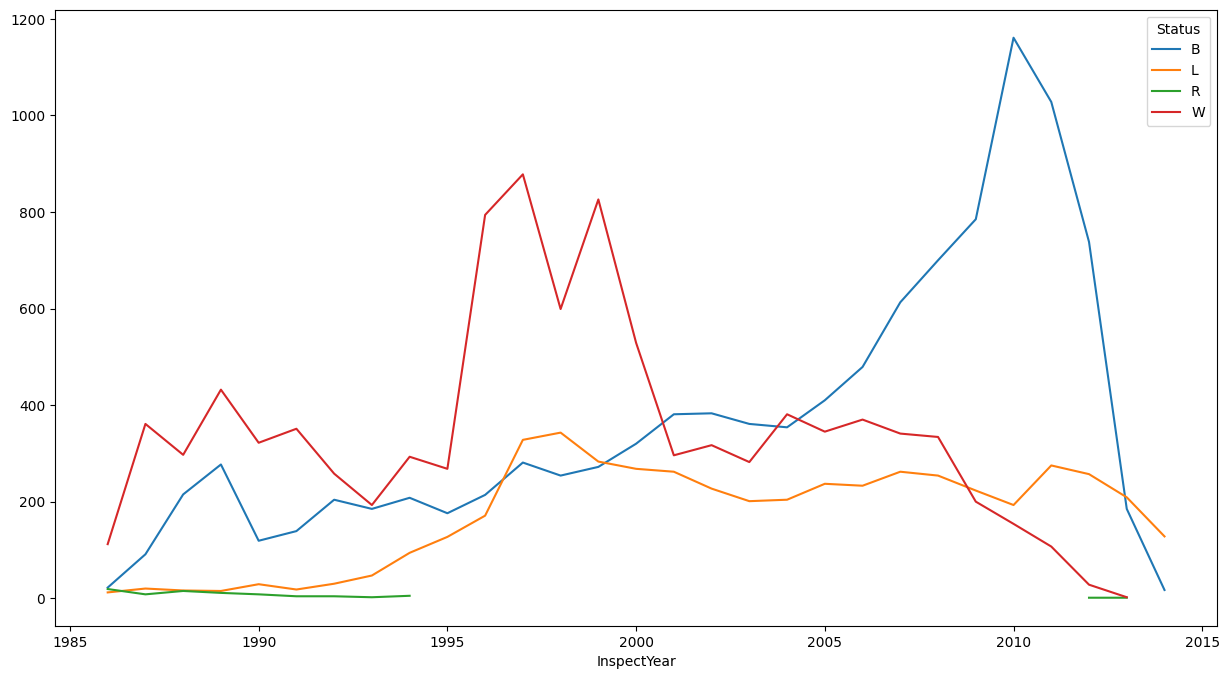

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

by_year.plot(figsize=(15,8))
# plt.legend(['Bad or Poor Conditioned','Land or Lot','Residential','Well Maintained'])

---

## Observation
There were less number of property that were ready to inspect and there were no property that are ready to inspect. So, the green line is discontinous.

we can observe red graph that is waiting for action that means total raised issue on the bridge as per the year. according to the graph we can see there was drastic raise from 1995 upto 2002. later officials started to respond from 2004, this can be seen in blue line which means undergoing repair.

In the period of 2013 the red line is ending that means there was no issues after that the blue line is also ending after that and green line is starting it means the repaired bridges are ready to inspect.

But the orange line doesn't influence other graphs greatly. It is about the legal or structural issues, it was raised when red line raised and it raised again with red line and it was again raised when everything is coming to normal.


## It is about Property conditions in Saint louis city.
B: Bad or Poor Condition:

It could indicate that the property is in poor condition, requires significant maintenance or repairs, or has other issues that categorize it as "bad."
L: Land or Lot:

It might represent that the property is primarily a vacant land or lot without a structure.
R: Residential:

It could signify that the property is classified as residential. This might include single-family homes, apartments, or other residential structures.
W: Good or Well-Maintained:

In some cases, "W" might be used to represent a status indicating that the property is in good condition or is well-maintained.

# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `https://hds5210-data.s3.awsamazon.com/meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [13]:
import pandas as pd
meetings = pd.read_csv('https://hds5210-data.s3.amazonaws.com/meetings.csv')      # Loading our dataset
meetings['startDate'] = meetings['startTime'].str[0:10]                           # Obtaining only 10 characters from the startTime.

meetings['startDate'] = pd.to_datetime(meetings['startDate'])                     # Converting the data to date time series
Before_Filter = (meetings['startDate'] >= '2020-02-17') & (meetings['startDate'] < '2020-02-29')      # Using Before filter
During_Filter = (meetings['startDate'] >= '2020-03-16') & (meetings['startDate'] < '2020-03-28')      # Using During Filter
meetings.loc[Before_Filter,'status'] = 'BEFORE'                                                       # Creating New column called status and in it where ever true comes for respective
meetings.loc[During_Filter,'status'] = 'DURING'                                                       # filters we add respective data in it i.e., BEFORE and DURING
meetings=meetings[(meetings['status']=='BEFORE') | (meetings['status']=='DURING')]                    # Then filtering the dataset where the column has respective datas
mod_meetings = meetings[['userName','status']]                                                        # obtaining only two columns from the dataset.
mod_meetings = mod_meetings.groupby(['userName', 'status']).value_counts().reset_index()              # Now using groupby I counted the total data.
mod_meetings.columns=['userName','status','count']                                                    # I am giving the column names as like this.

In [14]:
mod_meetings

,userName,status,count
0,Drew.Marco,BEFORE,12
1,Drew.Marco,DURING,19
2,amit.bhagat,BEFORE,17
3,amit.bhagat,DURING,30
4,andrea.bryant.amitechsolutions,BEFORE,5
5,andrea.bryant.amitechsolutions,DURING,3
6,angie.warren,BEFORE,5
7,angie.warren,DURING,9
8,chris.rogers.amitechsolutions,BEFORE,4
9,chris.rogers.amitechsolutions,DURING,3


In [16]:
mod_meetings = mod_meetings.pivot_table(index='userName', columns='status', values='count').fillna(0)      # Now using pivot table I am creating userName BEFORE and DURING columns

In [17]:
mod_meetings['pctChange'] = (mod_meetings['DURING'] - mod_meetings['BEFORE'])/mod_meetings['BEFORE']        # This is the calculation I used to create pctChange column.
summary = mod_meetings
summary

status,BEFORE,DURING,pctChange
userName,,,
Drew.Marco,12.0,19.0,0.583333
amit.bhagat,17.0,30.0,0.764706
andrea.bryant.amitechsolutions,5.0,3.0,-0.400000
angie.warren,5.0,9.0,0.800000
chris.rogers.amitechsolutions,4.0,3.0,-0.250000
eric.keeney,15.0,27.0,0.800000
eric.rodman,4.0,12.0,2.000000
jeff.hatfield.amitechsolutions,13.0,26.0,1.000000
jennifer.patton.amitechs,5.0,7.0,0.400000


---

In [11]:
assert(len(summary) == 22)
summary['pctChange'].mean().round(2)

0.92

In [12]:
assert(summary['pctChange'].mean().round(2) == 0.92)



---



## Submitting Your Work

Submit as usual
